[실습]
아래 식을 만족하는 데이터 셋을 생성하고, 학습하는 모델 만들기

$y = \frac{2}{1+e^{2x+1}} + 1$

In [16]:
import keras
import numpy as np
import matplotlib.pyplot as plt

x_train = np.random.rand(100,1)
y_train = 2 / (1 + np.exp(x_train*2 + 1)) + 1
x_test = np.random.rand(20,1)
y_test = 2 / (1 + np.exp(x_test*2 + 1)) + 1

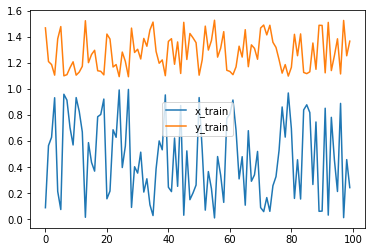

In [17]:
plt.plot(x_train, label='x_train')
plt.plot(y_train, label='y_train')
plt.legend(loc=0)
plt.show()

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='sigmoid', input_dim=1))
model.add(keras.layers.Dense(1))

model.summary()
sgd = keras.optimizers.SGD(lr=0.05)
model.compile(sgd, 'mse')
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6495 - val_loss: 0.1173
Epoch 2/100
80/80 [==============================] - 0s 74us/step - loss: 0.0702 - val_loss: 0.0354
Epoch 3/100
80/80 [==============================] - 0s 75us/step - loss: 0.0270 - val_loss: 0.0315
Epoch 4/100
80/80 [==============================] - 0s 75us/step - loss: 0.0253 - val_loss: 0.0303
Epoch 5/100
80/80 [==============================] - 0s 87us/step - loss: 0.0252 - val_loss: 0.0297

Epoch 76/100
80/80 [==============================] - 0s 62us/step - loss: 0.0114 - val_loss: 0.0148
Epoch 77/100
80/80 [==============================] - 0s 75us/step - loss: 0.0114 - val_loss: 0.0145
Epoch 78/100
80/80 [==============================] - 0s 75us/step - loss: 0.0111 - val_loss: 0.0140
Epoch 79/100
80/80 [==============================] - 0s 75us/step - loss: 0.0109 - val_loss: 0.0139
Epoch 80/100
80/80 [==============================] - 0s 62us/step - loss: 0.0108 - val_loss: 0.0136
Epoch 81/100
80/80 [==============================] - 0s 62us/step - loss: 0.0107 - val_loss: 0.0135
Epoch 82/100
80/80 [==============================] - 0s 75us/step - loss: 0.0106 - val_loss: 0.0133
Epoch 83/100
80/80 [==============================] - 0s 75us/step - loss: 0.0107 - val_loss: 0.0133
Epoch 84/100
80/80 [==============================] - 0s 75us/step - loss: 0.0105 - val_loss: 0.0131
Epoch 85/100
80/80 [==============================] - 0s 62us/step - loss: 0.0102 - val_los

In [19]:
y_predict = model.predict(x_test)